# Nova Dwi Lestari (5190411340)

In [80]:
#Import library
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import statistics

import scipy
from scipy import stats

In [81]:
#read file yang akan digunakan, disini saya memberi dengan nama data_mhs.csv
import pandas as pd
df = pd.read_csv("/content/drive/My Drive/Datasets/data_mhs.csv")
df

,NPM,Nama,Jenis Kelamin,Jenis Sekolah Lanjutan,Status SMA/K,IPK Sem_1,IPK Sem_2,Status kelulusan
0,1901,Soplo,L,SMK,S,3.0,2.0,Tepat
1,1902,Sopli,L,SMA,N,2.0,2.0,Tidak
2,1903,NaN,L,SMA,S,2.5,3.0,Tidak
3,1904,Soplu,P,SMA,N,3.1,3.1,Tepat
4,1905,Soplo,NaN,SMK,N,2.0,3.1,Tidak
5,1906,Sopli,L,SMA,S,2.0,2.0,Tidak
6,1907,Sopla,L,SMA,S,NaN,2.0,Tepat
7,1908,Soplu,P,SMA,N,NaN,3.0,Tepat


**A. PENANGANAN MISSING VALUES**

Cek NaN, melakukan pengecekan jumlah data yang kosong ada berapa dan ada pada kolom apa
Python Pandas memungkinkan kita dapat menemukan missing value secara cepat dengan fungsi isnull()
Lakukan agregasi data agar mudah dipahami dengan fungsi sum()

In [82]:

df.isnull().sum()


NPM                       0
Nama                      1
Jenis Kelamin             1
Jenis Sekolah Lanjutan    0
Status SMA/K              0
IPK Sem_1                 2
IPK Sem_2                 0
Status kelulusan          0
dtype: int64

Menampilkan data dengan menggunakan perintah .head

In [83]:
df.head(10)

,NPM,Nama,Jenis Kelamin,Jenis Sekolah Lanjutan,Status SMA/K,IPK Sem_1,IPK Sem_2,Status kelulusan
0,1901,Soplo,L,SMK,S,3.0,2.0,Tepat
1,1902,Sopli,L,SMA,N,2.0,2.0,Tidak
2,1903,NaN,L,SMA,S,2.5,3.0,Tidak
3,1904,Soplu,P,SMA,N,3.1,3.1,Tepat
4,1905,Soplo,NaN,SMK,N,2.0,3.1,Tidak
5,1906,Sopli,L,SMA,S,2.0,2.0,Tidak
6,1907,Sopla,L,SMA,S,NaN,2.0,Tepat
7,1908,Soplu,P,SMA,N,NaN,3.0,Tepat


Mencari nilai mean dari kolom IPK Sem_1, disini saya akan menggunakan rerata/ rata-rata dari kolom IPK yang ada nilai NaN nya. Dan data yang kosong ini nantinya akan diisi oleh mean atau rata-ratanya dari keseluruhan yg ada pada kolom IPK Sem_1

In [84]:

mean = df['IPK Sem_1'].mean()
print (mean)

2.433333333333333


In [85]:
##replace with mean and mode
#mengganti kolom NaN atau missing valuesnya dengan menggunakan mean untuk Nilai yang ada angkanya, dan modus untuk yang bukan number atau yang sifatnya string
#fillna() untuk mengisi nilai yang kosong
#Missing value di kolom IPK Sem_1 akan diisi dengan rata-rata dari semua ipk yg ada (menggunakan mean)
#Modus dari sekumpulan nilai data adalah nilai yang paling sering muncul. Ini adalah nilai di mana data paling mungkin untuk dijadikan sampel. 
df['IPK Sem_1'].fillna(df['IPK Sem_1'].mean(), inplace = True)

df['Nama'].fillna(df['Nama'].mode()[0], inplace = True)

df['Jenis Kelamin'].fillna(df['Jenis Kelamin'].mode()[0], inplace = True)

In [86]:
##Mengecek kembali data
#terlihat bahwa data NaN sudah tidak ada lagi, missin values berhasil ditangani
df.head(10)

,NPM,Nama,Jenis Kelamin,Jenis Sekolah Lanjutan,Status SMA/K,IPK Sem_1,IPK Sem_2,Status kelulusan
0,1901,Soplo,L,SMK,S,3.000000,2.0,Tepat
1,1902,Sopli,L,SMA,N,2.000000,2.0,Tidak
2,1903,Sopli,L,SMA,S,2.500000,3.0,Tidak
3,1904,Soplu,P,SMA,N,3.100000,3.1,Tepat
4,1905,Soplo,L,SMK,N,2.000000,3.1,Tidak
5,1906,Sopli,L,SMA,S,2.000000,2.0,Tidak
6,1907,Sopla,L,SMA,S,2.433333,2.0,Tepat
7,1908,Soplu,P,SMA,N,2.433333,3.0,Tepat


**B. STATISTIK DESKRIPTIF**

In [87]:
#Menggunakan .std untuk menghitung standar deviasi untuk kolom atau baris dalam dataframe
print (df['IPK Sem_1'].std())

0.4364357804719848


In [88]:
print (df['IPK Sem_2'].std())

0.5625198409199194


In [89]:
#Melakukan pengecekan tipe data pada df
df.dtypes

NPM                         int64
Nama                       object
Jenis Kelamin              object
Jenis Sekolah Lanjutan     object
Status SMA/K               object
IPK Sem_1                 float64
IPK Sem_2                 float64
Status kelulusan           object
dtype: object

In [90]:
#disini saya ingin mengganti NPM yang tadinya bertipe int menjadi str atau string agar tidak terhitung di describenya
df['NPM'] = df['NPM'].astype(str)

In [91]:
df['NPM'].dtypes

dtype('O')

In [92]:
#Pandas describe() digunakan untuk melihat beberapa detail statistik dasar seperti persentil, mean, std, dll. dari bingkai data atau serangkaian nilai numerik.
print("----IPK Sem_1 & IPK Sem_2----\n=============================")
df.describe()

----IPK Sem_1 & IPK Sem_2----


,IPK Sem_1,IPK Sem_2
count,8.000000,8.00000
mean,2.433333,2.52500
std,0.436436,0.56252
min,2.000000,2.00000
25%,2.000000,2.00000
50%,2.433333,2.50000
75%,2.625000,3.02500
max,3.100000,3.10000


**C.VISUALISASI DATA**

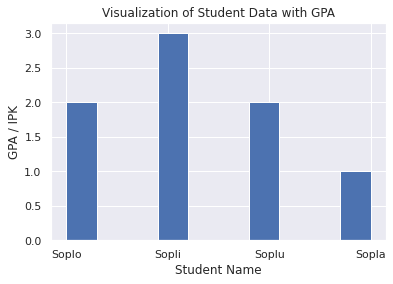

In [97]:
#import library
import seaborn as sns
sns.set(color_codes=True)
from matplotlib import pyplot as plt

#Fungsi hist() dalam modul pyplot library matplotlib digunakan untuk memplot histogram.
#untuk x label dan y label adalah nama yang ingin saya berikan pada histogramnya
#title --> untuk judul pada histogramnya
#.show untuk menampilkan
#disini saya ingin menampilkan nama mahasiswa dengan nilai ipk yang didapatnya
name_plot = plt
name_plot.hist(df['Nama'])
name_plot.xlabel('Student Name')
name_plot.ylabel('GPA / IPK')
name_plot.title('Visualization of Student Data with GPA')
name_plot.show()



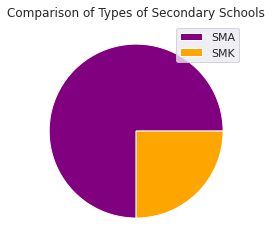

In [98]:
#import library
from matplotlib import pyplot as plt

#Fungsi pie() dalam modul pyplot library matplotlib digunakan untuk memplot diagram pie.
#Legend adalah area yang menggambarkan elemen grafik. 
#title --> untuk judul pada diagram pie
#.show untuk menampilkan
#disini saya ingin menampilkan jenis sekolah lanjutan yang ada pada data mahasiswa
type_plot = plt
type_plot.pie(df['Jenis Sekolah Lanjutan'].value_counts(), colors=('purple', 'orange'))
type_plot.legend(['SMA', 'SMK'])
type_plot.title('Comparison of Types of Secondary Schools')
type_plot.show()

**SOAL NOMOR 2**

READ DATA

In [99]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [100]:
##read file yang akan digunakan, disini saya memberi dengan nama diabetes.csv
dataset = pd.read_csv("/content/drive/My Drive/Datasets/diabetes.csv")
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [101]:
# Replace zeroes
zero_not_accepted = ['Glucose','BloodPressure','SkinThickness','BMI','Insulin']

for column in zero_not_accepted:
  dataset[column] = dataset[column].replace(0, np.NaN)
  mean = int(dataset[column].mean(skipna=True))
  dataset[column] = dataset[column].replace(np.NaN, mean)


In [102]:
print(dataset['Glucose'])

0      148.0
1       85.0
2      183.0
3       89.0
4      137.0
       ...  
763    101.0
764    122.0
765    121.0
766    126.0
767     93.0
Name: Glucose, Length: 768, dtype: float64


In [103]:
# Split dataset
X = dataset.iloc[:, 0:8]
y = dataset.iloc[:,8]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)


In [104]:
# Feature scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [105]:
#Metode angka python sqrt() mengembalikan akar kuadrat dari x untuk x > 0.
import math
math.sqrt(len(y_test))

12.409673645990857

In [106]:
#Define the model: Init K-NN
classifier = KNeighborsClassifier(n_neighbors=11, p=2, metric='euclidean')


In [107]:
#Fit model
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [108]:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=1, n_neighbors=11, p=2,
                     weights='uniform')

KNeighborsClassifier(metric='euclidean', n_jobs=1, n_neighbors=11)

In [109]:
#Predict the test set result
y_pred = classifier.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Tampilkan jarak setiap data yang dihasilkan dengan menggunakan distance matrix

In [110]:
from sklearn.metrics import DistanceMetric
dist = DistanceMetric.get_metric('euclidean')
dist.pairwise(X)

array([[ 0.        , 66.90348403, 41.94153103, ..., 56.37291836,
        26.65196586, 61.71982942],
       [66.90348403,  0.        , 98.33103803, ..., 56.86977436,
        44.5561444 , 12.74524602],
       [41.94153103, 98.33103803,  0.        , ..., 76.25347421,
        59.87774486, 91.21698005],
       ...,
       [56.37291836, 56.86977436, 76.25347421, ...,  0.        ,
        48.72597681, 52.76025872],
       [26.65196586, 44.5561444 , 59.87774486, ..., 48.72597681,
         0.        , 42.06056533],
       [61.71982942, 12.74524602, 91.21698005, ..., 52.76025872,
        42.06056533,  0.        ]])

In [111]:
#Evaluate Model
#Confusion Matrix adalah error metric, yang digunakan untuk menilai kinerja Algoritma klasifikasi ML. Ini memberi informasi terperinci tentang tingkat akurasi, tingkat presisi, dan persen kesalahan model.
#Dengan menggunakan matriks konfusi, kita dapat membedakan antara hasil yang benar dan yang diprediksi dari variabel respon kategoris.
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[94 13]
 [15 32]]


Ini mewakili ringkasan prediksi yang dilakukan oleh model klasifikasi.
TRUE NEGATIF (TN): Nilai yang sebenarnya negatif dan juga diprediksi sebagai negatif.
FALSE NEGATIF (FN): Nilai yang sebenarnya positif tetapi diprediksi sebagai negatif.
FALSE POSITIF (FP): Nilai yang sebenarnya negatif tetapi diprediksi sebagai positif.
TRUE POSITIF (TP): Nilai yang sebenarnya positif dan diprediksi juga positif.

In [112]:
print(f1_score(y_test, y_pred))

0.6956521739130436


Accuracy: Ini didefinisikan sebagai nilai yang menunjukkan persentase prediksi yang berhasil dari input yang diberikan.

In [113]:
print(accuracy_score(y_test, y_pred))

0.8181818181818182


Dan akurasi 80% memberi tahu kita bahwa model ini cukup cocok